# Importar datos desde drive

In [ ]:
from google.colab import drive
from getpass import getpass
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/')
token = getpass('Introduce tu token de GitHub: ')
username = "arantafall"
prj_name = "prediccion-ataques-ciber"

# Clonar el repositorio usando el token
os.system(f'git clone https://{token}@github.com/{username}/{prj_name}.git')

Introduce tu token de GitHub: ··········


32768

In [ ]:
os.chdir(f'/content/drive/My Drive/{prj_name}')

In [ ]:
%ls -A

 app.py                        datos_modificados.csv       modelo_knn.pkl       scaler.pkl
'Copy of Predict_AJAX.ipynb'   .git/                       Predict_AJAX.ipynb
 data/                         modelo_knn_comprimido.pkl   README.md


In [ ]:
!git config --global user.email "Aran.Tafall.campusimpelia@gmail.com"
!git config --global user.name "arantafall"

# KNN

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("./datos_modificados.csv")

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
dfm = df[['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bulk Rate', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2 = scaler.fit_transform(dfm)

df2 = pd.DataFrame(df2, columns=dfm.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X = df2
y = df.Label

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_temp.shape

((69105, 67), (621950, 67))

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_val.shape, X_test.shape

((62195, 67), (559755, 67))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(
    X_train,
    y_train
)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
Y_pred[:5]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
647525,0.000489,2.575833e-04,0.000005,0.000007,0.000065,3.221691e-07,0.001612,0.01937,0.008619,0.000000,...,0.000005,0.344262,0.00000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
655720,0.595775,1.916667e-07,0.000000,0.000004,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.540984,0.00000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
166663,0.000901,7.046505e-01,0.000025,0.000022,0.000239,1.849282e-05,0.011805,0.00000,0.010523,0.018605,...,0.000005,0.540984,0.00001,0.0,0.000009,0.00001,0.703333,0.0,0.703333,0.703333
238000,0.000901,6.929768e-01,0.000029,0.000022,0.000277,1.849282e-05,0.013658,0.00000,0.010435,0.019929,...,0.000005,0.540984,0.00001,0.0,0.000010,0.00001,0.692500,0.0,0.692500,0.692500
215216,0.000901,8.219902e-01,0.000025,0.000022,0.000252,1.849282e-05,0.012450,0.00000,0.011097,0.019621,...,0.000005,0.540984,0.00001,0.0,0.000010,0.00001,0.821667,0.0,0.821667,0.821667


In [ ]:
y_test[:5]

,Label
647525,BENIGN
655720,BENIGN
166663,DoS Hulk
238000,DoS Hulk
215216,DoS Hulk


In [ ]:
from sklearn.metrics import accuracy_score
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision:.2f}')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matriz_conf = confusion_matrix(y_test, y_pred)

clases = ["Benign", "DoS Hulk", "DoS Goldeneye", "DoS Slowloris", "DoS Slowhttptest", "Heartbleed"]

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión - KNN")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
scores = []

for k in np.arange(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    scores.append(accuracy_score(y_val, knn.predict(X_val)))

In [ ]:
scores

[0.9981509767666211,
 0.9979580352118338,
 0.9978454859715411,
 0.9974274459361685,
 0.9974113674732695,
 0.9971701905297854,
 0.9970576412894927,
 0.9965592089396254,
 0.9964627381622317,
 0.9961572473671517,
 0.9958678350349707,
 0.9954497949995981,
 0.9952890103706086,
 0.9949674411126296,
 0.9949192057239328,
 0.9944690087627622,
 0.9946297933917517,
 0.9944368518369644]

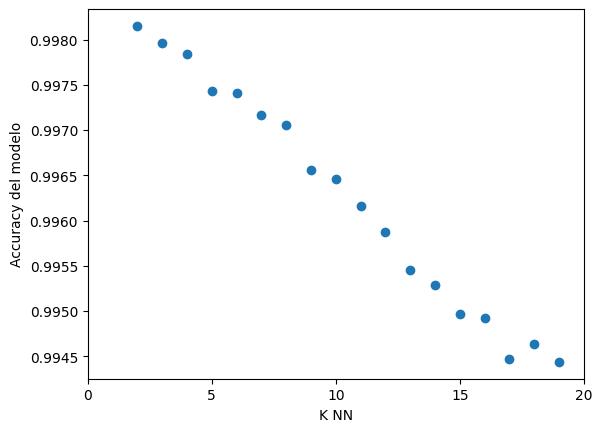

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('K NN')
plt.ylabel('Accuracy del modelo')
plt.scatter(range(1,20), scores)
plt.xticks([0,5,10,15,20]);

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

accuracy_score(y_test, knn.predict(X_test))

0.998067011460371

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(
    X_train,
    y_train
)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
Y_pred[:5]

In [ ]:
y_test[:5]

In [ ]:
from sklearn.metrics import accuracy_score
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision:.2f}')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

matriz_conf = confusion_matrix(y_test, y_pred)

clases = ["Benign", "DoS Hulk", "DoS Goldeneye", "DoS Slowloris", "DoS Slowhttptest", "Heartbleed"]

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión - KNN")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

guardar KNN

In [ ]:
import joblib
joblib.dump(knn, "modelo_knn.pkl")

['modelo_knn.pkl']

In [ ]:
from google.colab import files
files.download("modelo_knn.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
joblib.dump(knn, "/content/drive/My Drive/modelo_knn.pkl")

['/content/drive/My Drive/modelo_knn.pkl']